In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
# 퍼셉트론을 이용해서 꽃잎의 길이와 너비로 붓꽃 품종 분류

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

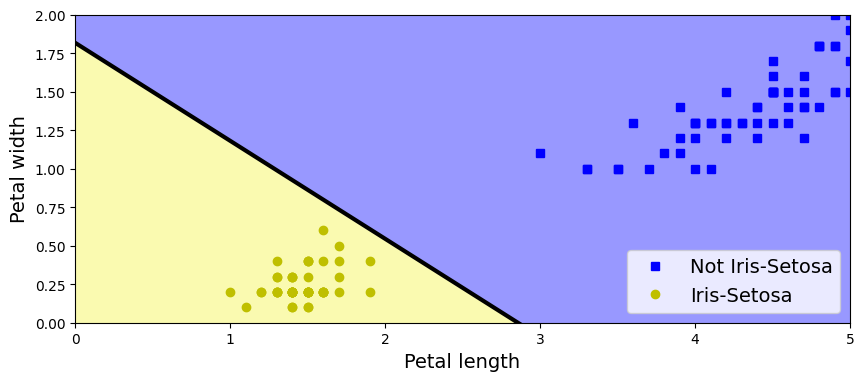

In [3]:
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

In [4]:
# 활성화 함수

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

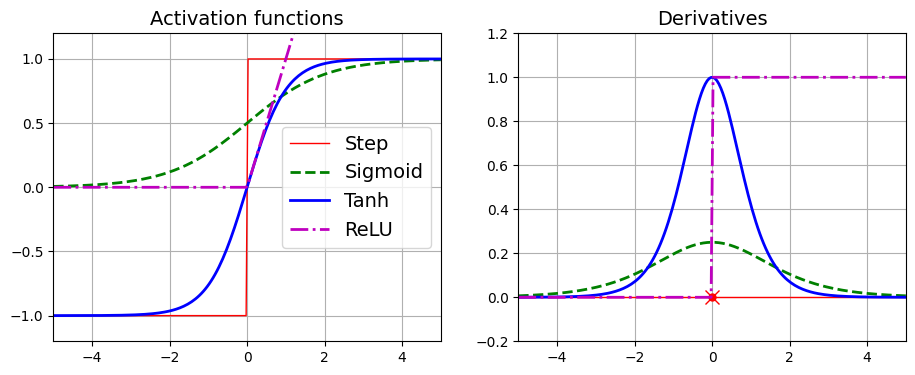

In [5]:
# 활성화 함수값과 미분한 값 비교

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

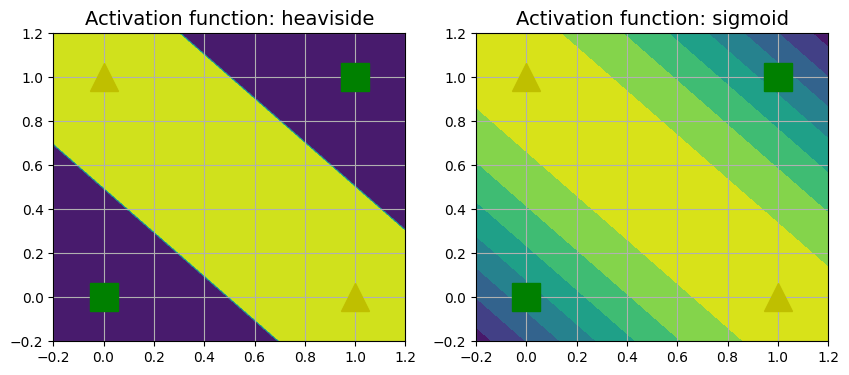

In [6]:
# 계단함수와 시그모이드를 활성함수로 사용해서 XOR문제 풀기

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [7]:
# 케라스를 통해 패션 MNIST데이터 적제

import tensorflow as tf
import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

mnist데이터는 60000개의 훈련 샘플과 10000개의 테스트 셋으로 구성되었다.

그리고 각각의 샘플은 28 * 28 크기의 픽셀로 되어있다.

검증을 위한 검증 세트를 5000개정도로 분류하고 픽셀 강도를 255로 나눠 0 ~ 1 범위의 실수로 바꿔준다.

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

패션 MNIST에서 레이블은 0에서 9까지 숫자로 표현되어있다.

해당하는 숫자는 순서대로 "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"을 의미한다.

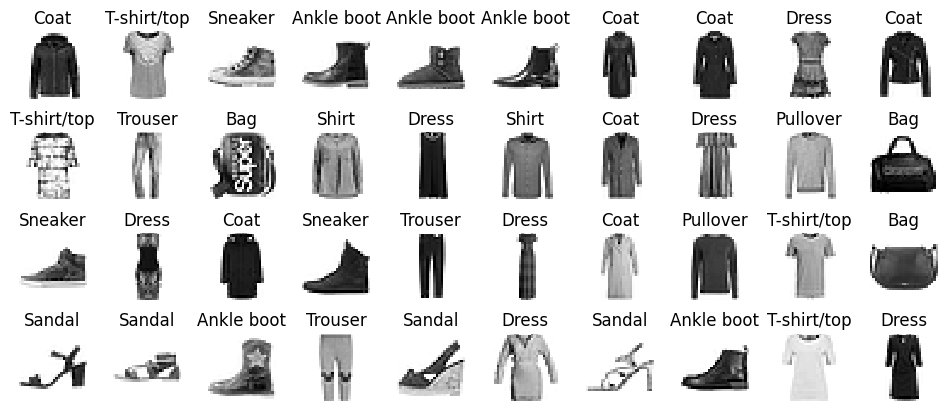

In [11]:
# 데이터셋의 샘플 이미지 출력

n_rows = 4
n_cols = 10
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

이제 신경망을 통해서 패션MNIST를 학습한다.

먼저 입력 이미지를 1차원 배열로 바꿔 학습을 할 수 있게 한다.

그 후 300개의 뉴런을 가지고 ReLU를 활성함수로 사용하는 은닉층을 추가한다.

다음은 100개의 뉴런을 가진 은닉층을 더 추가한다.

마지막으로 총 10개의 클래스가 있어 10개의 뉴런을 가진 출력층을 추가한다.

이때 각각의 클래스는 서로 배타적이기 때문에 소프트맥스를 활성함수로 사용하였다.

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.layers

In [14]:
# 모델에 있는 모든 층 출력

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


첫 번째 은닉층의 경우 784 * 300개의 연결 가중치와 300개의 편향을 가진다.

따라서 총 파라미터의 수는 235500개인데 이정도 되는 파라미터 수이면 훈련 데이터를 학습하기 충분한 유연성을 가지게 된다.

### 손실함수와 옵티마이저

이제 손실함수와 옵티마이저를 지정해야한다.

패션 MNIST데이터의 레이블은 하나의 정수이고, 이 정수가 하나의 클래스를 나타낸다.

따라서 각 클래스가 배타적이기 때문에 손실함수로 "sparse_categorical_crossentropy"를 사용한다.

만약 데이터가 클래스별로 타깃 확률을 가지고 있다면 "categorical_crossentropy"를 사용해야한다.

옵티마이저에 "sgd"를 사용하면 확률적 경사 하강법으로 모델을 훈련한다.

그리고 해당 모델은 분류기이기 때문에 정확도를 평가 기준으로 한다.

In [15]:
# 모델 손실함수와 옵티마이저 지정

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7300 - accuracy: 0.7629 - val_loss: 0.4962 - val_accuracy: 0.8364
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4825 - accuracy: 0.8312 - val_loss: 0.4309 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4364 - accuracy: 0.8465 - val_loss: 0.4073 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4113 - accuracy: 0.8553 - val_loss: 0.3941 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3906 - accuracy: 0.8621 - val_loss: 0.3821 - val_accuracy: 0.8648
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3755 - accuracy: 0.8682 - val_loss: 0.3743 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3627 - accuracy: 0.8726 - val_loss: 0.3763 - val_accuracy

훈련 후 검증 세트의 정확도가 약 89.3%에 도달하였다.

훈련 세트의 저확도인 91.74%와 큰 오차가 없으므로 과대적합 없이 잘 학습 되었음을 볼 수 있다.

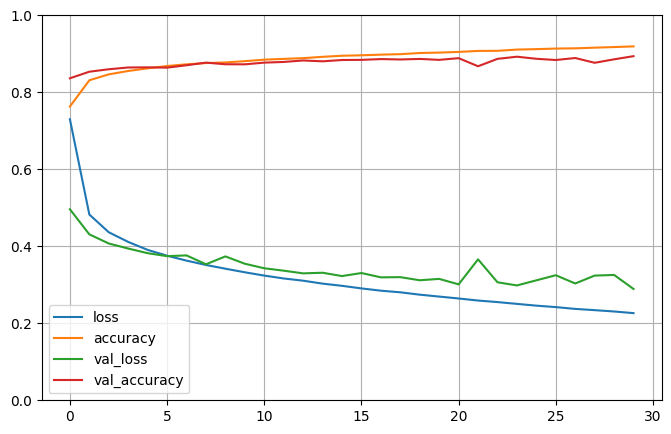

In [17]:
# 훈련 세트와 검증 세트에 대한 손실 및 정확도 확인

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
# 구한 모델로 테스트 셋 평가

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3219 - accuracy: 0.8865


[0.32188767194747925, 0.8865000009536743]

In [19]:
# 모델로 예측기 만들기 - 어떤 클래스에 속할지 확률

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 81ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
# 모델로 예측기 만들기 - 어떤 클래스일 확률이 높은지

y_pred = np.argmax(model.predict(X_new), axis=-1)
np.array(class_names)[y_pred]

1/1 [==============================] - 0s 21ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

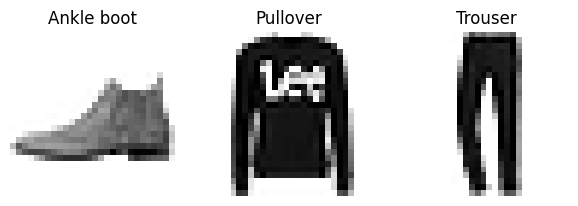

In [21]:
# 실제 값과 비교

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

모델이 새로운 샘플에 대해 맞게 예측을 한 것을 확인 할 수 있다.

따라서 모델이 잘 학습되었음을 알 수 있다.

In [22]:
# 회귀 MLP - 캘리포니아 주택 가격 데이터셋

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

회귀 모델에서는 출력층이 하나의 값을 예측하기 때문에 마지막에 활성화 함수가 없이 하나의 뉴런을 가지게 된다.

그리고 손실 함수도 정답과 얼마나 오차가 있는지 확인해야 하기 때문에 평균 제곱 오차를 손실 함수로 사용하였다.

In [23]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.1634 - val_loss: 1.2909
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8012 - val_loss: 0.7796
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6937 - val_loss: 0.7412
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6514 - val_loss: 0.7188
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.6185 - val_loss: 0.7719
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5924 - val_loss: 0.6507
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5682 - val_loss: 0.5533
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5457 - val_loss: 0.6478
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5295 - val_loss: 0.5088
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5127 - val_loss: 0.5075

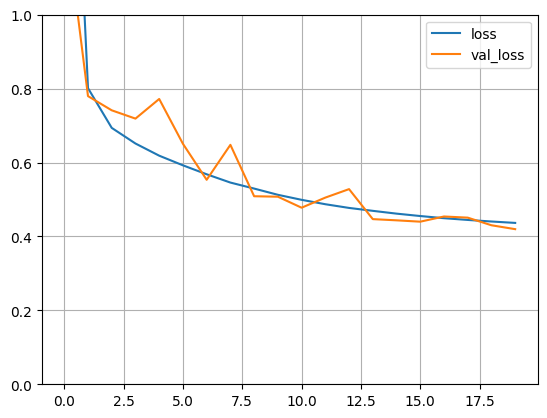

In [24]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

모든 신경망 모델이 단순하게 순서대로 나열되지는 않는다.

어떤 신경망은 여러 개의 입력이 있거나 여러 개의 출력이 있는등의 매우 복잡한 구조를 가진다.

예시로는 와이드 & 딥 신경망이 있는데 이는 입력의 일부 또는 전체가 출력층에 바로 연결된다.

이 모델을 사용하면 깊게 쌓은 층을 이용해서 복잡한 패턴을 찾아낼 수 있고, 짧은 경로로는 간단한 규칙을 찾아낼 수 있다.

In [25]:
X_train.shape

(11610, 8)

### 함수형 API

캘리포니아 주택 데이터를 함수형 API로 학습을 한다.

먼저 입력 데이터의 크기를 입력 데이터의 특성의 갯수만큼의 요소로 이루어진 1차원 벡터로 설정한다.

그 후 30개의 뉴런을 가진 은닉층을 생성하는데 함수형 API이기 때문에 뒤에 (input_)과 연결되었음을 표시해준다.

그리고 출력층에는 hidden2와 input_이 모두 연결되어야 함으로 concatenate를 이용하여 두 층을 연결한 Concaternate 층을 만들어 준 다음에 출력층과 연결해 준다.

In [26]:
# 함수형 API로 캘리포니아 주택문제 해결

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [28]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.0833 - val_loss: 1.9264
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7997 - val_loss: 3.1829
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7153 - val_loss: 0.8958
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6630 - val_loss: 1.3981
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6201 - val_loss: 0.6262
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5919 - val_loss: 0.6594
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5670 - val_loss: 0.5303
Epoch 8/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5464 - val_loss: 0.6218
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5332 - val_loss: 0.5034
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5181 - val_loss: 0.4918

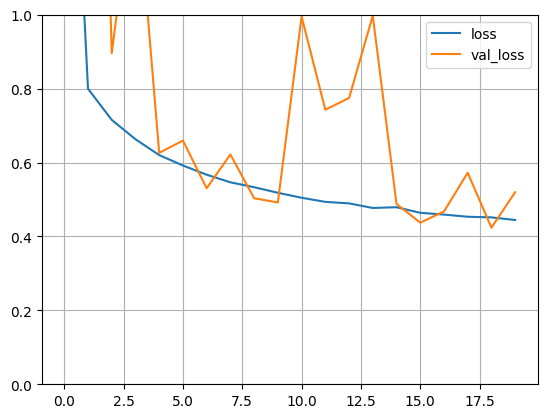

In [29]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

함수형 API에서는 입력층에서 특성을 모두 다 와이드 경로나 딥경로로 보내는 것이 아니라 일부 특성만 나눠서 보낼수도 있다.

따라서 다음은 특성 0에서 4까지 5개의 특성을 와이드 경로에 보내고, 특성 2에서 7까지 6개의 특성을 딥 경로로 전달하였다.

In [30]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [31]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.8850 - val_loss: 5.0851
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.7918 - val_loss: 1.9549
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6649 - val_loss: 0.8991
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6061 - val_loss: 0.6248
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5693 - val_loss: 0.5402
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5413 - val_loss: 0.5009
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5192 - val_loss: 0.4816
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5020 - val_loss: 0.4678
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4880 - val_loss: 0.4551
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4771 - val_loss: 0.4444

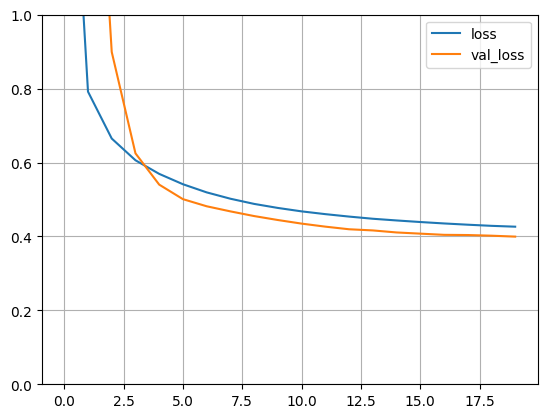

In [32]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

여러개의 출력이 필요한 경우

 1. 출력값이 여러개인 경우
 <br>

 2. 동일한 데이터에서 독립적인 여러 작업을 수행할 때 <br>
    작업마다 새로운 신경망을 사용해 훈련할수도 있지만 단일 신경망으로 하는것이 일반적으로 결과가 더 좋다.   
 <br>

 3. 규제 기법으로 사용하는 경우<br>
    신경망 구조 안에서 보조 출력을 추가하여 하위 네트워크가 나머지 네트워크에 의존하지 않고 자체로 유용한 것을 학습하는지 확인한다.
    
아래는 규제를 위해 보조 출력을 추가한 경우이다.

기본적으로 케라스에서 나열된 손실을 모두 더하여 최종 손실을 구하지만 보조출력보다 주 출력이 더 중요하다면 손실의 가중치를 아래처럼 다르게 하여 출력해야한다.


In [33]:
# 규제를 위한 보조 출력 추가

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [34]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 2.2455 - main_output_loss: 2.0608 - aux_output_loss: 3.9072 - val_loss: 2.2043 - val_main_output_loss: 2.1521 - val_aux_output_loss: 2.6742
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.9149 - main_output_loss: 0.7635 - aux_output_loss: 2.2775 - val_loss: 1.0102 - val_main_output_loss: 0.9161 - val_aux_output_loss: 1.8567
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7765 - main_output_loss: 0.6716 - aux_output_loss: 1.7207 - val_loss: 0.7276 - val_main_output_loss: 0.6378 - val_aux_output_loss: 1.5355
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.7137 - main_output_loss: 0.6301 - aux_output_loss: 1.4659 - val_loss: 0.6852 - val_main_output_loss: 0.6069 - val_aux_output_loss: 1.3902
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6742 - main_output_loss: 0.6009 - aux_output_loss: 1.3335 - val_loss

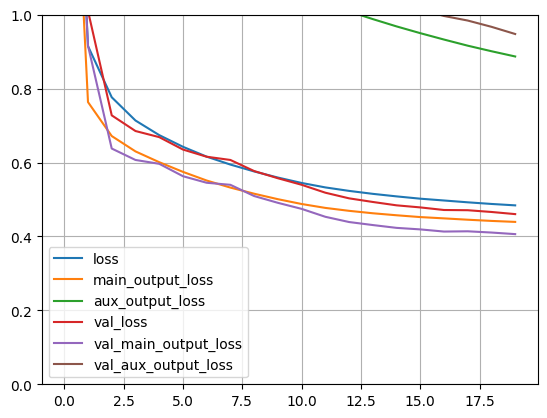

In [35]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [36]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 3ms/step - loss: 0.4783 - main_output_loss: 0.4352 - aux_output_loss: 0.8662


1/1 [==============================] - 0s 59ms/step


### 서브클래싱 API

함수형 API는 모두 선언적이기 때문에 사용할 층과 연결 방식을 먼저 정의한다.

이러한 방식은 모델을 저장하거나 복사, 공유하기가 쉽고, 모델에 데이터를 넣기전에 에러를 확인할 수 있다.

하지만 모델에 반복문이 포함되고, 조건문도 다뤄야 하는등 동적인 구조가 필요할 때가 있다.

이럴때는 서브클래싱 API를 사용해야 한다.

In [37]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    # 모델구조
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [38]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 2.2075 - output_1_loss: 2.0079 - output_2_loss: 4.0044 - val_loss: 6.5168 - val_output_1_loss: 5.3068 - val_output_2_loss: 17.4070
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 1.1327 - output_1_loss: 0.9420 - output_2_loss: 2.8488 - val_loss: 2.3240 - val_output_1_loss: 1.0290 - val_output_2_loss: 13.9788
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8867 - output_1_loss: 0.7407 - output_2_loss: 2.2010 - val_loss: 1.8352 - val_output_1_loss: 0.7134 - val_output_2_loss: 11.9315
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7848 - output_1_loss: 0.6651 - output_2_loss: 1.8614 - val_loss: 1.5639 - val_output_1_loss: 0.6560 - val_output_2_loss: 9.7356
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.7250 - output_1_loss: 0.6198 - output_2_loss: 1.6719 - val_loss: 1.3538 - val_output_1_loss: 0.6336 - val

1/1 [==============================] - 0s 64ms/step


In [39]:
# 모델의 저장

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [40]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.5032 - val_loss: 1.0549
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.8491 - val_loss: 0.7154
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6847 - val_loss: 0.6181
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6250 - val_loss: 0.6160
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5839 - val_loss: 0.5695
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5507 - val_loss: 0.5036
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5221 - val_loss: 0.4790
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 0.4512
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4796 - val_loss: 0.4361
Epoch 10/10
162/162 [==============================] - 1s 3ms/step - loss: 0.4450


In [41]:
model.save("my_keras_model.keras")

In [42]:
# 모델 복원

rmodel = keras.models.load_model("my_keras_model.keras")

In [43]:
rmodel.predict(X_new)

1/1 [==============================] - 0s 73ms/step


array([[0.48127776],
       [1.5064273 ],
       [3.0447533 ]], dtype=float32)

대규모의 데이터 셋을 사용하여 훈련이 몇 시간동안 지속될 경우 컴퓨터상의 문제로 종료가 되어 실행 결과를 다 잃어버릴 수 있다.

이러한 경우 콜백을 사용해서 훈련도중 일정 간격으로 체크 포인트를 저장해야한다.

In [44]:
keras.backend.clear_session()

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [46]:
# callbacks을 통해 일정한 간격으로 모델의 체크포인트르 저장

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1453 - val_loss: 2.7106
Epoch 2/10
 57/363 [===>..........................] - ETA: 0s - loss: 0.8812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 4ms/step - loss: 0.7595 - val_loss: 0.6628
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6420 - val_loss: 0.6076
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6011 - val_loss: 0.5668
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5691 - val_loss: 0.5408
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5413 - val_loss: 0.5089
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5184 - val_loss: 0.5045
Epoch 8/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4989 - val_loss: 0.4906
Epoch 9/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4825 - val_loss: 0.4602
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4511


In [47]:
# 조기종료
# 일정 에포크동안 검증 세트에 대한 점수가 향상되지 않으면 종료

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4585 - val_loss: 0.4951
Epoch 2/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4496 - val_loss: 0.4575
Epoch 3/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4420 - val_loss: 0.4521
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4355 - val_loss: 0.4428
Epoch 5/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4301 - val_loss: 0.4394
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4250 - val_loss: 0.4407
Epoch 7/100
363/363 [==============================] - 2s 4ms/step - loss: 0.4204 - val_loss: 0.4654
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4165 - val_loss: 0.4522
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4126 - val_loss: 0.4967
Epoch 10/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4093 - val_lo

In [48]:
# 사용자 정의 콜백 - 검증 손실과 훈련 손실의 비용 출력

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

357/363 [============================>.] - ETA: 0s - loss: 0.3780
val/train: 1.28
363/363 [==============================] - 2s 5ms/step - loss: 0.3763 - val_loss: 0.4836


### 텐서보드를 이용해 시각화

텐서보드는 훈련하는 동안 학습 곡선을 그리거나 여러 실행간의 학습 곡선을 비교하여 시각화 하는등의 분석을 수행할 수 있다.

그리고 모델이 생성한 이미지를 확인하거나, 3D에 투영된 다차언 데이터를 시각화 하는등 다양한 시각화 기능이 있다.

In [49]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_10_09-15_10_59'

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [51]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 1.9691 - val_loss: 4.6598
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.8148 - val_loss: 3.8241
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.7215 - val_loss: 1.2529
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6698 - val_loss: 1.0460
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6237 - val_loss: 0.8355
Epoch 6/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5972 - val_loss: 1.0356
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5650 - val_loss: 0.6821
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5459 - val_loss: 0.6412
Epoch 9/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5194 - val_loss: 0.4985
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5018 - val_loss: 0.4958

In [57]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2023_10_09-15_18_18'

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [55]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [56]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5251 - val_loss: 3.8634
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.4992 - val_loss: 1.5741
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3941 - val_loss: 0.7865
Epoch 4/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3749 - val_loss: 8.8096
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3649 - val_loss: 1.7743
Epoch 6/30
363/363 [==============================] - 4s 11ms/step - loss: 0.4042 - val_loss: 0.3662
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 2s 4ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [=

In [59]:
# 하이퍼파라미터 튜닝

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [62]:
!pip install scikeras

In [63]:
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_model)

In [64]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 3s 8ms/step - loss: 1.2198 - val_loss: 0.6945
Epoch 2/100
363/363 [==============================] - 4s 10ms/step - loss: 0.5864 - val_loss: 0.5095
Epoch 3/100
363/363 [==============================] - 3s 9ms/step - loss: 0.5151 - val_loss: 0.4567
Epoch 4/100
363/363 [==============================] - 3s 9ms/step - loss: 0.4700 - val_loss: 0.4541
Epoch 5/100
363/363 [==============================] - 3s 7ms/step - loss: 0.4479 - val_loss: 0.4179
Epoch 6/100
363/363 [==============================] - 3s 9ms/step - loss: 0.4315 - val_loss: 0.4614
Epoch 7/100
363/363 [==============================] - 4s 10ms/step - loss: 0.4264 - val_loss: 0.3922
Epoch 8/100
363/363 [==============================] - 3s 8ms/step - loss: 0.4203 - val_loss: 0.3881
Epoch 9/100
363/363 [==============================] - 3s 9ms/step - loss: 0.4148 - val_loss: 0.3962
Epoch 10/100
363/363 [==============================] - 3s 8ms/step - loss: 0.4122 - val_

KerasRegressor(
	model=<function build_model at 0x7d5894f7a680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [65]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step


In [66]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 22ms/step
